In [161]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れる場合はFalse

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        # 損失を記録する配列と、線形回帰の係数を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = np.array([])
        
    def _linear_hypothesis(self,X):
        # Xが2以上の特徴量を有する場合
        if X.ndim != 1 :
            n_features = X.shape[1]
            m_samples  = X.shape[0]
            h_coef = np.array(range(n_features))
            h_coef = h_coef.reshape((1,n_features))
        # Xが1のみの特徴量の場合
        else:
            X = X.reshape(-1,1)
            h_coef = np.array(range(len(X)))
            h_coef = h_coef.reshape((1,-1))
        return h_coef
    
    #　係数の初期値を渡す。

    def _gradient_descent(self,X,y):
        difference = np.dot(X, self.coef_.T) - y
        self.coef_ = self.coef_ - self.lr/len(X) * np.dot(difference.T, X)
    
    def fit(self, X, y, X_val=None, y_val=None):

        # yのshapeを＊行1列に固定。
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1,1)
        
        # bias有の場合は、XとX_val に 左側から１列追加
        if self.bias != True:
            X = np.hstack([np.ones((len(X),1))  ,X])
            X_val = np.hstack([np.ones((len(X_val),1)) ,X_val])
         
        self.coef_ = self._linear_hypothesis(X)
        
        for i in range(self.iter) :
            self._gradient_descent(X, y)
            self._loss_function(X, y, i, X_val, y_val)
        
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#            print()

    def predict(self, X):
        """
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        return     np.dot(X,  self.coef_.T)
    
    def _loss_function(self, X, y, iter_number, X_val, y_val):
        difference1 = np.dot(X, self.coef_.T) - y
        loss_f1 = np.dot(difference1.T, difference1) /(2*len(X))
        self.loss[iter_number] = loss_f1
        
        difference2 = np.dot(X_val, self.coef_.T) - y_val
        loss_f2 = np.dot(difference2.T, difference2) /(2*len(X_val))        
        self.val_loss[iter_number] = loss_f2


## 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。


In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches

In [2]:
#     def _linear_hypothesis(self,X):
#         # Xが2以上の特徴量を有する場合
#         if X.ndim != 1 :
#             n_features = X.shape[1]
#             m_samples  = X.shape[0]
#             h_coef = np.array(range(n_features))
#             h_coef = h_coef.reshape((1,n_features))
#         # Xが1のみの特徴量の場合
#         else:
#             X = X.reshape(-1,1)
#             h_coef = np.array(range(len(X)))
#             h_coef = h_coef.reshape((1,-1))
#         return h_coef
    """
    初期値としての、線形の仮定関数を作成する。

    Parameters
    ----------
    X : 次の形のndarray, shape (m_samples, n_features)
      学習データ
    mは、サンプル数でindex_ID（↓）に相当する。
    nは、特徴量の数でカラム（→）に相当する。
    Xのshapeタプルには、fit関数の入力時点で数字が入っておくようにしておく。
 
    Returns
    -------
      次の形のndarray, shape (m_samples, 1)
      線形の仮定関数の、初期係数

    """


## 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [ ]:
"""
trainデータのXとtargetデータのyを入力して、self.coef_を更新する。
fit関数内のfor文により、iter回数だけ_gradient_descentと、_loss_functionが繰り返される。

"""

#     def _gradient_descent(self,X,y):
#         difference = np.dot(X, self.coef_.T) - y
#         self.coef_ = self.coef_ - self.lr/len(X) * np.dot(difference.T, X)

## 【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 hθ(x)
の出力が推定結果です。

In [ ]:
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
# def predict(self, X):
#     return     np.dot(X,  self.coef_.T )

## 【問題4】平均二乗誤差  
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。  
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。  
平均二乗誤差は以下の数式で表されます。  

In [189]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値。predictの結果を入力する。
    y : 次の形のndarray, shape (n_samples,)
      正解値。y_testを入力する。

    Returns
    ----------
    mse : float。平均二乗誤差
    """
    y_pred = y_pred.reshape(-1,1)
    y = y.reshape(-1,1)

    m_samples = y_pred.shape[0]
    mse = 0.0
    for k in range(m_samples) :
        mse = mse + (y_pred[k,0]-y[k,0])*(y_pred[k,0]-y[k,0])
    mse = mse/m_samples
    
    return mse

In [190]:
### y_pred_sclatch, y_testの変数は、問題６のGrlivAreaの時点で生成する。
MSE(y_pred_sclatch,y_test)

2727114879.861911

## 【問題5】目的関数

In [148]:
"""
fit関数のfor文でiter_number回繰り返される。
difference1：X_trainとself_coef.Tのdot積と、y_trainの差分
difference2：X_test（X_val）とself_coef.Tのdot積と、y_test(y_val)の差分
これらの２乗を２×サンプル数で除したもの（目的関数）が、self.lossとself.val_lossに蓄積される。

"""
#     def _loss_function(self, X, y, iter_number, X_val, y_val):
#         difference1 = np.dot(X, self.coef_.T) - y
#         loss_f1 = np.dot(difference1.T, difference1) /(2*len(X))
#         self.loss[iter_number] = loss_f1
        
#         difference2 = np.dot(X_val, self.coef_.T) - y_val
#         loss_f2 = np.dot(difference2.T, difference2) /(2*len(X_val))        
#         self.val_loss[iter_number] = loss_f2

## 【問題6】 学習と推定
(sklearn との比較)

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

aims_data = pd.read_csv("train.csv")
aims_data = aims_data[["GrLivArea","YearBuilt","SalePrice"]]
X_aims1 = aims_data[["GrLivArea"]].values
X_aims2 = aims_data[["YearBuilt"]].values
y_aims = aims_data.SalePrice.values


In [173]:
###### GrlivArea #########
###### スクラッチ ########
X_train, X_test, y_train, y_test = train_test_split(X_aims1, y_aims, test_size=0.25, random_state = 1)

clf = ScratchLinearRegression(1000,  0.0000001, True, True)
clf.fit(X_train, y_train, X_test, y_test)
y_pred_sclatch = clf.predict(X_test)

###### Sklearn ########
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred_sklearn = linear_reg.predict(X_test)

In [174]:
###### YearBuilt #########
###### スクラッチ ########
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_aims2 ,y_aims, test_size=0.25, random_state = 1)

clf = ScratchLinearRegression(500000,  0.0000004, True, True)
clf.fit(X_train2, y_train2, X_test2, y_test2)
y_pred_sclatch2 = clf.predict(X_test2)

###### Sklearn ########
linear_reg = LinearRegression()
linear_reg.fit(X_train2,y_train2)
y_pred_sklearn2 = linear_reg.predict(X_test2)

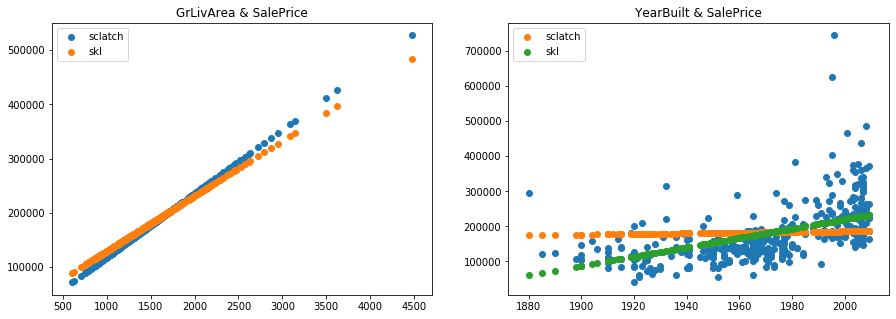

In [175]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)            
plt.scatter(X_test, y_pred_sclatch, label="sclatch")
plt.scatter(X_test, y_pred_sklearn, label="skl")
plt.title("GrLivArea & SalePrice")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test2,y_test2)
plt.scatter(X_test2, y_pred_sclatch2, label="sclatch")
plt.scatter(X_test2, y_pred_sklearn2, label="skl")
plt.title("YearBuilt & SalePrice")
plt.legend()
plt.show()


## GrlivArea では、sclatchとsklearnによる演算結果がよく一致している。YearBuiltでは両者の演算結果の一致性が甘いため、対数化して検証したところ、sclatctのsklearnに対するフィッティング性が向上したように思える。

In [166]:
###### targetを対数化 ####
###### YearBuilt #########
###### スクラッチ ########
X_aims1 = aims_data[["GrLivArea"]].values
X_aims2 = aims_data[["YearBuilt"]].values
y_aims = aims_data.SalePrice.values

y_aims = np.log(y_aims)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_aims2 ,y_aims, test_size=0.25, random_state = 1)

clf = ScratchLinearRegression(500000,  0.0000004, True, True)
clf.fit(X_train2, y_train2, X_test2, y_test2)
y_pred_sclatch2 = clf.predict(X_test2)

###### Sklearn ########
linear_reg = LinearRegression()
linear_reg.fit(X_train2,y_train2)
y_pred_sklearn2 = linear_reg.predict(X_test2)

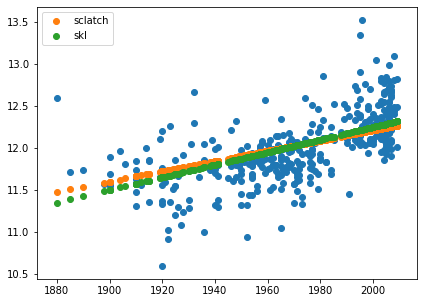

In [167]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)     
plt.scatter(X_test2,y_test2)
plt.scatter(X_test2, y_pred_sclatch2, label="sclatch")
plt.scatter(X_test2, y_pred_sklearn2, label="skl")
plt.legend()
plt.show()

## 【問題7】学習曲線のプロット

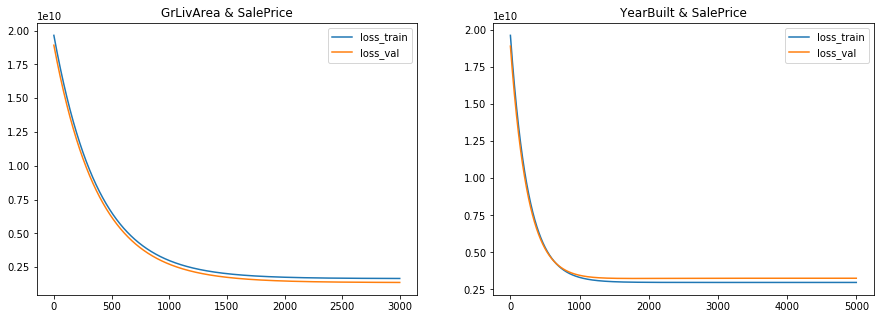

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

aims_data = pd.read_csv("train.csv")
aims_data = aims_data[["GrLivArea","YearBuilt","SalePrice"]]
X_aims1 = aims_data[["GrLivArea"]].values
X_aims2 = aims_data[["YearBuilt"]].values
y_aims = aims_data.SalePrice.values

#### GrlivAREA #####
X_train, X_test, y_train, y_test = train_test_split(X_aims1, y_aims, test_size=0.25, random_state = 1)
clf = ScratchLinearRegression(3000,  0.0000000005, True, True)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)  
clf.fit(X_train, y_train, X_test, y_test)
plt.plot(np.array(range(3000)), clf.loss, label = "loss_train")
plt.plot(np.array(range(3000)), clf.val_loss, label = "loss_val")
plt.title("GrLivArea & SalePrice")
plt.legend()

# #### YearBuilt #####
X_train, X_test, y_train, y_test = train_test_split(X_aims2, y_aims, test_size=0.25, random_state = 1)
clf = ScratchLinearRegression(5000,  0.0000000005, True, True)

plt.subplot(1,2,2)  
clf.fit(X_train, y_train, X_test, y_test)
plt.plot(np.array(range(5000)), clf.loss, label = "loss_train")
plt.plot(np.array(range(5000)), clf.val_loss, label = "loss_val")
plt.title("YearBuilt & SalePrice")
plt.legend()
plt.show()

## 【問題8】バイアス項の除去　（バイアス項の追加）

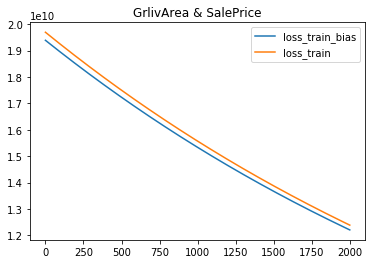

In [182]:
"""
ScratchLinearRegressionの第３引数をfalseにするとバイアス頂が追加される。
"""
##### GrlivArea #####
### バイアス項あり　###
X_train, X_test, y_train, y_test = train_test_split(X_aims1, y_aims, test_size=0.25, random_state = 1)
clf = ScratchLinearRegression(2000,  0.00000000005, False, True)
clf.fit(X_train, y_train, X_test, y_test)
plt.plot(np.array(range(2000)), clf.loss, label = "loss_train_bias")
#plt.plot(np.array(range(50)), clf.val_loss, label = "loss_val_bias")

### バイアス項なし　###
clf = ScratchLinearRegression(2000,  0.00000000005, True, True)
clf.fit(X_train, y_train, X_test, y_test)
plt.plot(np.array(range(2000)), clf.loss, label = "loss_train")
#plt.plot(np.array(range(50)), clf.val_loss, label = "loss_val")

plt.title("GrlivArea & SalePrice")
plt.legend()
plt.show()

##   ＜考察＞今回のケースでは、バイアス項があるほうがフィッティングが若干早いと思われる。